In [ ]:
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download 'puneet6060/intel-image-classification'

 96% 334M/346M [00:01<00:00, 214MB/s]
100% 346M/346M [00:01<00:00, 192MB/s]


In [ ]:
!unzip intel-image-classification.zip

In [ ]:


import tensorflow as tf
import os

In [ ]:


import numpy as np
from matplotlib import pyplot as plt



In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/seg_train/seg_train')

Found 14034 files belonging to 6 classes.


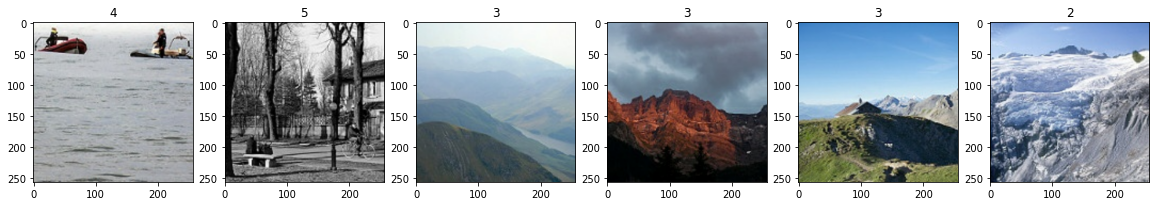

In [ ]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=6, figsize=(20,20))
for idx, img in enumerate(batch[0][:6]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
data = data.map(lambda x,y: (x/255, y))


train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)



train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)



In [ ]:


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout



In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3),  activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(6, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


307/307 [==============================] - 48s 117ms/step - loss: 1.1342 - accuracy: 0.5621 - val_loss: 0.8168 - val_accuracy: 0.6731
Epoch 2/10
307/307 [==============================] - 36s 115ms/step - loss: 0.7532 - accuracy: 0.7077 - val_loss: 0.7505 - val_accuracy: 0.7119
Epoch 3/10
307/307 [==============================] - 36s 115ms/step - loss: 0.5631 - accuracy: 0.7952 - val_loss: 0.6599 - val_accuracy: 0.7525
Epoch 4/10
307/307 [==============================] - 28s 91ms/step - loss: 0.4073 - accuracy: 0.8527 - val_loss: 0.6926 - val_accuracy: 0.7622
Epoch 5/10
307/307 [==============================] - 28s 92ms/step - loss: 0.2762 - accuracy: 0.9054 - val_loss: 0.9029 - val_accuracy: 0.7338
Epoch 6/10
307/307 [==============================] - 28s 92ms/step - loss: 0.1952 - accuracy: 0.9367 - val_loss: 1.0278 - val_accuracy: 0.7338
Epoch 7/10
307/307 [==============================] - 29s 93ms/step - loss: 0.1382 - accuracy: 0.9554 - val_loss: 1.0230 - val_accuracy: 0.7529


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [ ]:
model.evaluate(test)

43/43 [==============================] - 15s 38ms/step - loss: 1.4972 - accuracy: 0.7355


[1.4972069263458252, 0.7354651093482971]

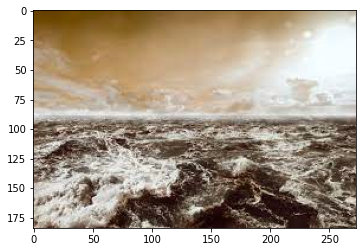

In [ ]:
import cv2


img = cv2.imread('index.jpg')
plt.imshow(img)
plt.show()



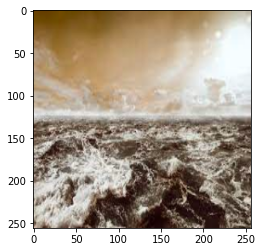

In [ ]:


resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()



In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [ ]:
yhat

array([[0.5728107 , 0.01411485, 0.9196297 , 0.9830577 , 0.9821814 ,
        0.06461897]], dtype=float32)

In [ ]:
model.save("/content/drive/MyDrive/models/intel_image_classification.h5")